In [1]:
%matplotlib inline
import pandas as pd
import os
os.chdir('/Users/michaelcaruana/Desktop/pycon-pandas-tutorial')

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [4]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Lucky Number,2015,USA,2015-09-01


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

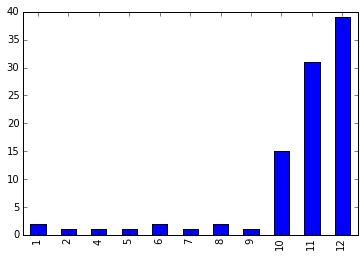

In [8]:
xmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
xmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

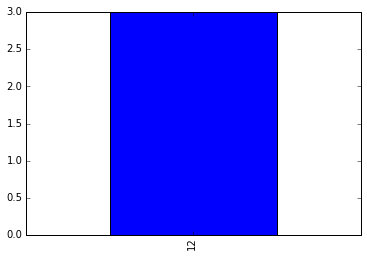

In [10]:
hobbit = release_dates[(release_dates.title.str.startswith('The Hobbit')) & (release_dates.country == 'USA')]
hobbit.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

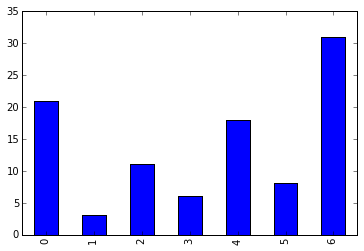

In [12]:
hobbit = release_dates[(release_dates.title.str.contains('Romance')) & (release_dates.country == 'USA')]
hobbit.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

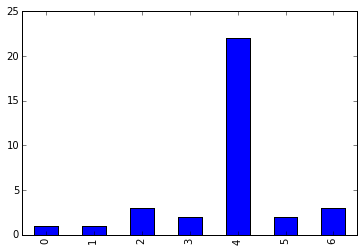

In [13]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [20]:
usa = release_dates[(release_dates.country == 'USA') & (release_dates.year//10*10 == 1990)]
judi = cast[(cast.name == 'Judi Dench')]
judi_usa = judi.merge(usa).sort('date')

In [21]:
judi_usa

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6,USA,1995-11-17
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3,USA,1996-03-22
1,Hamlet,1996,Judi Dench,actress,Hecuba,12,USA,1996-12-25
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1,USA,1997-10-03
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9,USA,1997-12-19
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6,USA,1999-11-19



### In which months do films with Judi Dench tend to be released in the USA?

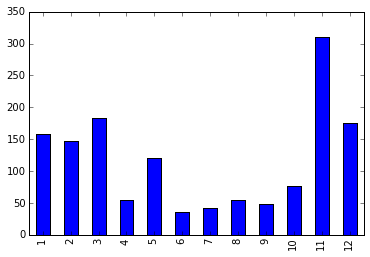

In [27]:
judi_new = judi.merge(release_dates)
judi_new.date.dt.month.value_counts().sort_index().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

In [28]:
tom = cast[cast.name == 'Tom Cruise']
usa = release_dates[(release_dates.country == 'USA')]
tom_usa = tom.merge(usa)

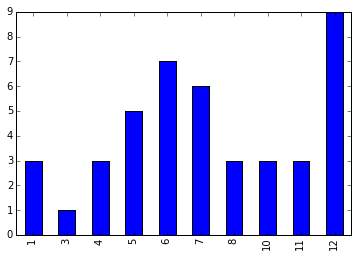

In [29]:
tom_usa.date.dt.month.value_counts().sort_index().plot(kind='bar')